<a href="https://colab.research.google.com/github/ShibinMohammed/Data-science-projects/blob/main/Video_Game_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Game Sales Analysis

### Problem Statement

Develop a business strategy to enable your company to enter into the video game development business. However, in the best interest of companies financial investment in this project, it is important to know whether there are enough buyers, in the long run, do the number of buyers increase so that they stay invested in this project.

Find out what kind of games are most popular in terms of the most units sold, what are the most commonly used gaming platforms such as PS4, Xbox, PC etc.

In [ ]:
# Importing the modules and loading the dataset.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data_link = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/video-games-sales/video-game-sales.csv'
df = pd.read_csv(data_link)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Get the dataset information using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Check for the null values in all the columns.
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Remove the rows/columns containing the null values.
df = df[df['Year'].isna() == False]
df = df[df['Publisher'].isna() == False]

In [ ]:
# Convert the data-type of the year values into integer values.
df['Year'] = df['Year'].astype('int')

In [ ]:
# Find out the total number of units sold yearly across different regions and the world.
 # store the number of units sold yearly in a variable (let's say 'group_year').
group_year = df.groupby(by='Year')
 # Get the total units sold from last 5 columns.
yearly_total_sales = group_year.sum().loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
yearly_total_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36


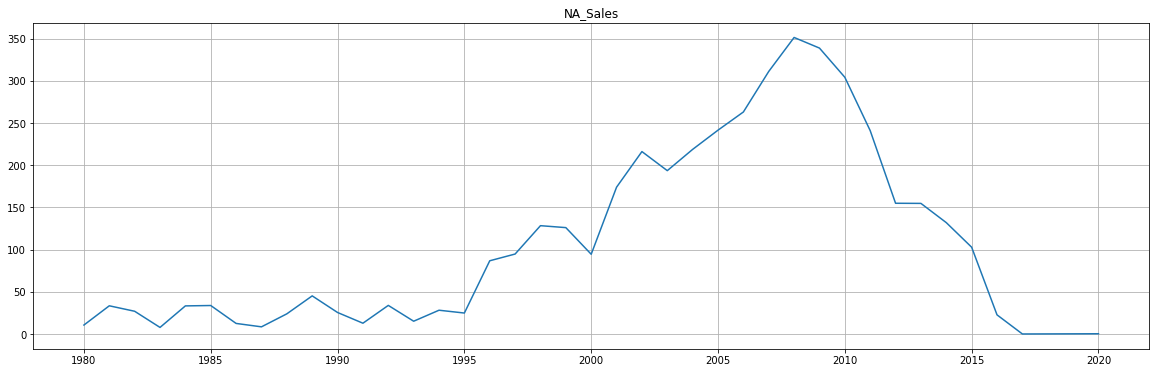

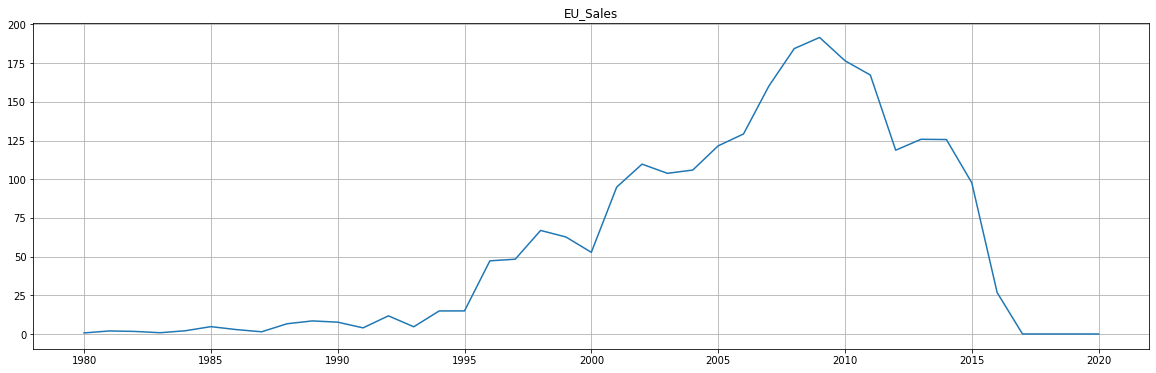

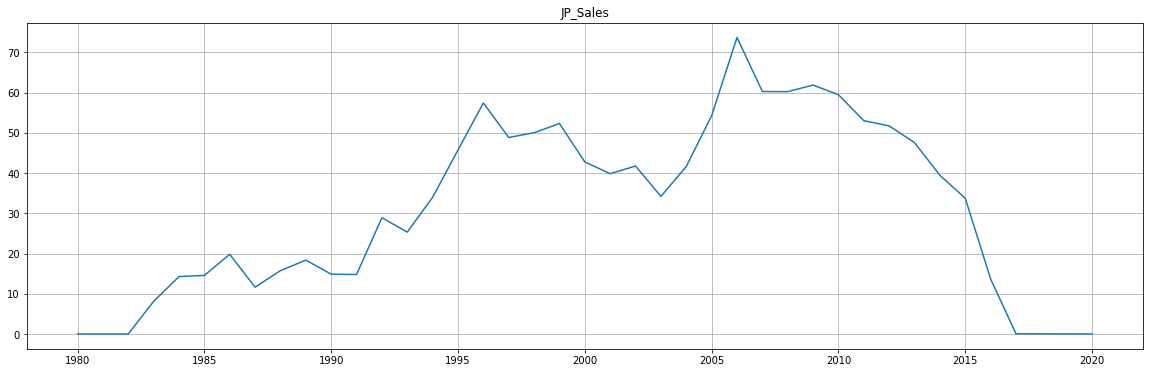

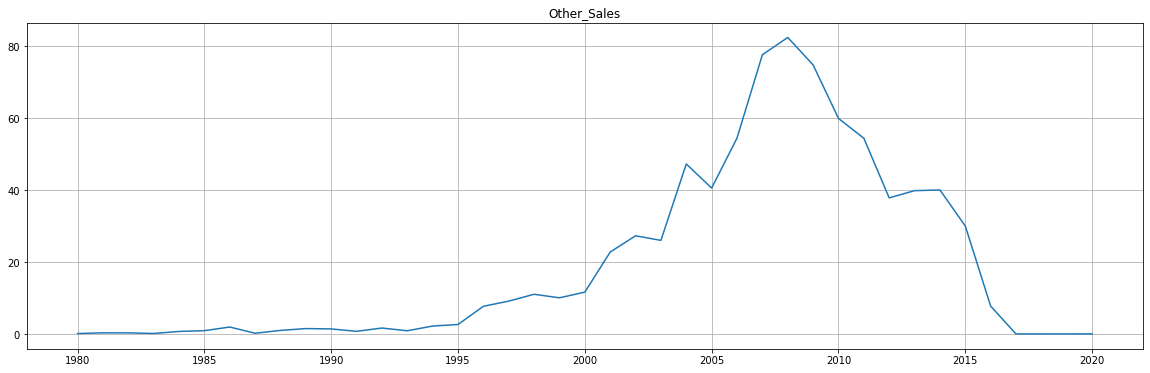

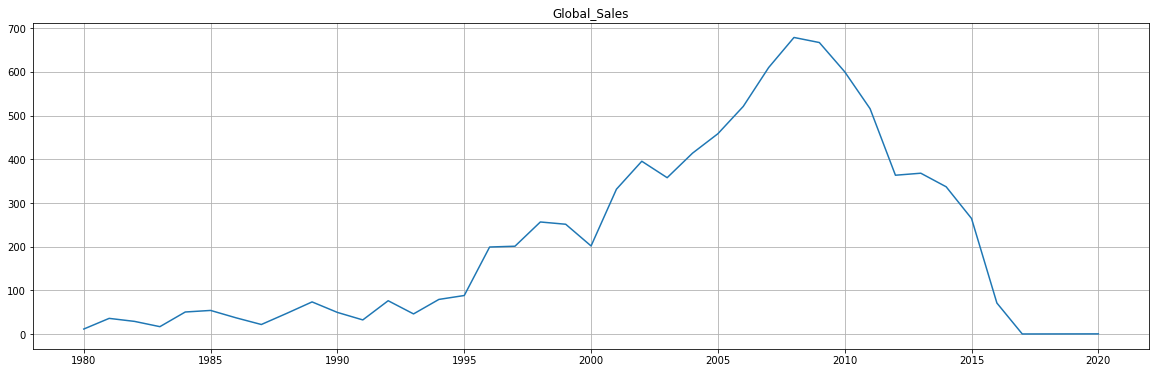

In [ ]:
# Create the line plots for the total number of units sold yearly across different regions and the world.
for i in yearly_total_sales.columns:
  plt.figure(figsize=(20,6))
  plt.title(i)
  plt.plot(yearly_total_sales.index,yearly_total_sales[i])
  plt.grid()
  plt.show()


In [ ]:
# In which year, the most number of games were sold globally and how many?
yearly_total_sales[yearly_total_sales['Global_Sales']==yearly_total_sales['Global_Sales'].max()]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2008,351.44,184.4,60.26,82.39,678.9


In [ ]:
# Find out the genre-wise total number of units sold across different regions and the world.
group_genre = df.groupby(by='Genre')
genre_total_sales = group_genre.sum().loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genre_total_sales.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.29,59.38,923.83
Shooter,575.16,310.45,38.18,101.90,1026.20


In [ ]:
type(genre_total_sales[i])

pandas.core.series.Series

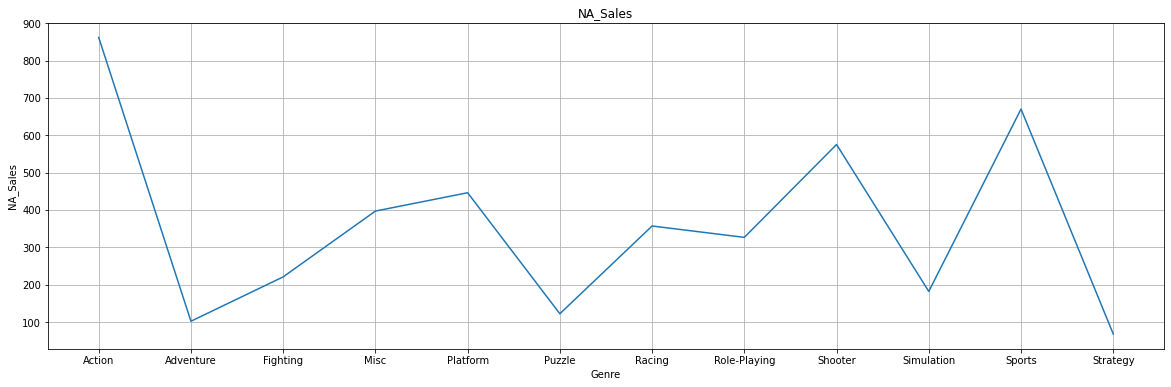

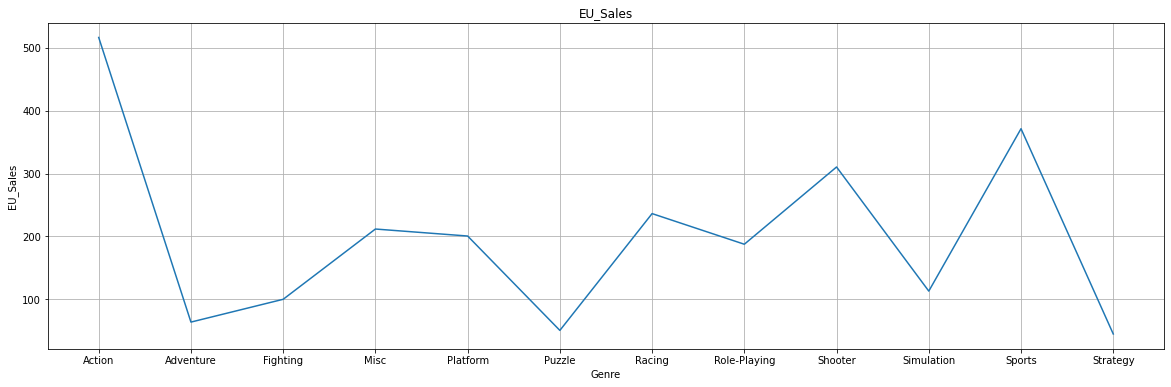

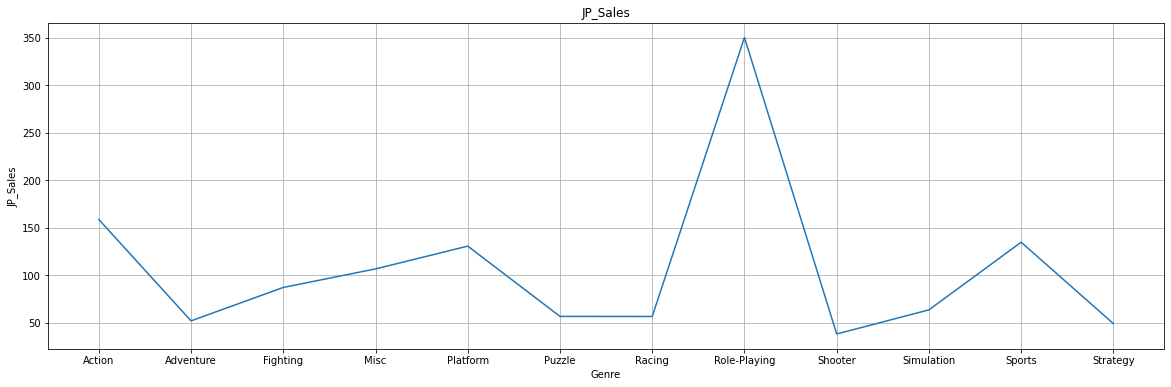

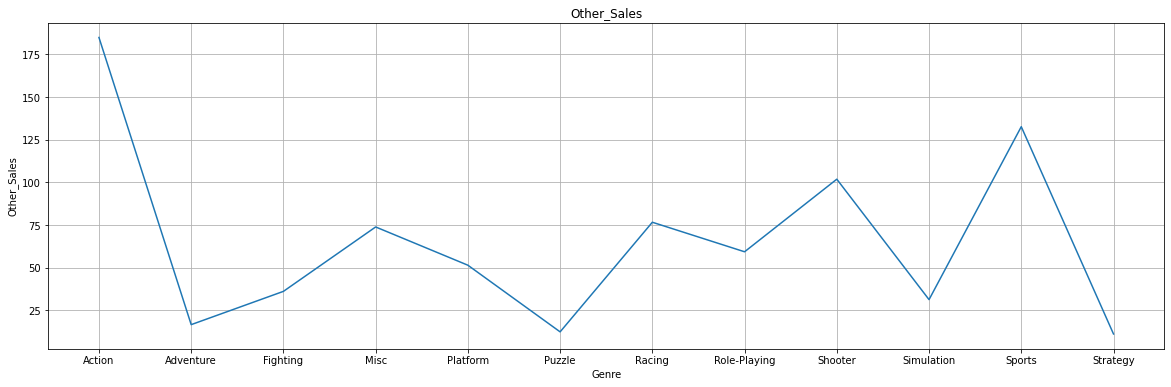

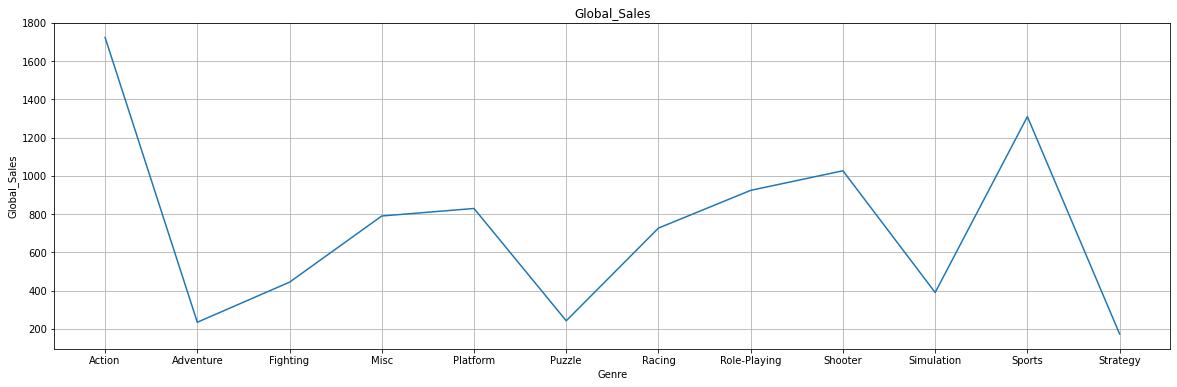

In [ ]:
# Create line plots for genre-wise total number of units sold across different regions and the world.
for i in genre_total_sales.columns:
  plt.figure(figsize=(20,6))
  plt.title(i)
  plt.plot(genre_total_sales.index,genre_total_sales[i])
  plt.xlabel('Genre')
  plt.ylabel(i)
  plt.grid()
  plt.show()

In [ ]:
# What genre of video game is most popular in Japan in terms of the total number of units sold?
genre_total_sales[genre_total_sales['JP_Sales']==genre_total_sales['JP_Sales'].max()]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Role-Playing,326.5,187.57,350.29,59.38,923.83


In [ ]:
# Genre-wise total number of units sold across different regions and the world in descending order.
 # Get the total units sold from last 5 columns.
group_genre = df.groupby(by='Genre')
genre_total_sales = group_genre.sum().loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

 # Sort the values in descending order
genre_desc = genre_total_sales.sort_values(by='Global_Sales', ascending=False)
genre_desc.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


In [ ]:
# Publisher-wise total number of units sold across different regions and the world in descending order.
 # Get the total units sold from last 5 columns.
group_publisher = df.groupby(by='Publisher')
publisher_total_sales = group_publisher.sum().loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
 # Sort the values in descending order
publisher_desc = publisher_total_sales.sort_values(by='Global_Sales', ascending=False)
publisher_desc.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.19,24.30,270.70


In [ ]:
# Find out the platform-wise the total number of units sold across different regions and the world in the descending order.
 # Get the total units sold from last 5 columns.
group_platform = df.groupby(by='Platform')
platform_total_sales = group_platform.sum().loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
 # Sort the values in descending order
platform_desc = platform_total_sales.sort_values(by='Global_Sales', ascending=False)
platform_desc.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91
PS,334.71,212.38,139.78,40.69,727.39
GBA,178.43,72.49,46.56,7.51,305.62
PSP,107.09,67.16,75.89,41.52,291.71
PS4,96.80,123.70,14.30,43.36,278.10
